# Центральная предельная теорема своими руками
## Распределение Парето

**Распределе́ние Паре́то в теории вероятностей** — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других. Вне области экономики иногда называется также распределением Брэдфорда.

Распределение Парето встречается при исследовании различных явлений, в частности, социальных, экономических и других.

Одно их знаменитых применение распределения Парето — мнемонический принцип 20/80, в наиболее общем виде формулируемый как "20% усилий дают 80% результата". Согласно нему утверждается также, что 20% популяции владеет 80% богатства, однако могут встречаться существенные количественные отклонения.

#### Определение:
Пусть случайная величина $X$ такова, что ее распределение задаётся равенством:

$F_{X}(x) = P(X<x) = 1-\left(\frac {x_m}{x}\right)^{k},\forall x\geq x_{m}$,
где $x_{m}, k > 0$. 

Тогда говорят, что $X$ имеет распределение Парето с параметрами $x_{m}$ и $k$.

#### Моменты:
Моменты случайной величины, имеющей распределение Парето, задаются формулой:

$E[X^n]=\frac{k x_m^n}{k-n}$,

откуда в частности:

$E[X]=\frac{k x_m}{k-1}$, $D[X]=(\frac{x_m}{k-1})^2(\frac{k}{k-2})$ для $k > 2$,


где $x_m \geq 1$ — минимальное (обязательно положительное) возможное значение $X$, а $k$ — индекс Парето или параметр формы распределения.

---
Для решения задачи мы зафиксируем значение параметра $k = 5$.

---
**Полезные ссылки:**
1. Распределение Парето - https://ru.wikipedia.org/wiki/Распределение_Парето;
2. Закон Парето - https://ru.wikipedia.org/wiki/Закон_Парето;
3. Statistical functions (scipy.stats) - https://docs.scipy.org/doc/scipy/reference/stats.html;
4. scipy.stats.pareto - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html;


In [2]:
#Импортируем необходимые библиотеки
%matplotlib inline
import math
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

#### Генерируем выборку объема $1000$, для которой строим гистогамму и теоретическую плотность распределения случайной величины.

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


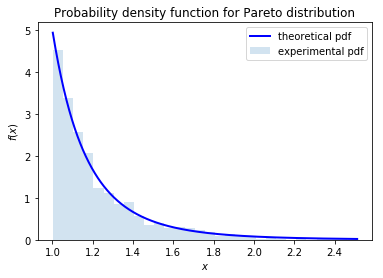

In [6]:
k = 5.0 #Задаем параметр
rv = sts.pareto(k)

size = 1000
a = rv.ppf(0.01)
b = rv.ppf(0.99)

x = np.linspace(a, b, size) #Равномерно распределенные числа в указанном интервале
y = rv.pdf(x) #Функция плотности вероятности
r = rv.rvs(size) #Генерация случайных чисел

plt.plot(x, y, 'b', lw=2, label='theoretical pdf')
plt.hist(r, range=(a, b), bins=30, normed=True, alpha=0.2, histtype='stepfilled', label='experimental pdf')

plt.title("Probability density function for Pareto distribution")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

#### Cчитаем среднее и дисперсию выбранного распределения согласно представленным выше формулам.

In [7]:
xm = 1.0 #Минимально возможное значение Х

E = (xm * k) / (k - 1.0) #Ожидаемое значение
D = ((xm / (k - 1.0))**2) * (k / (k - 2.0)) #Дисперсия

print(E, D) #Также можно использовать sts.pareto.stats (k, моменты = 'mvsk')

1.25 0.10416666666666667


#### Задачей является оценка распределения выборочного среднего случайной величины при разных объемах выборок. 

Для этого при трёх и более значениях $n$ нужно сгенерировать $1000$ выборок объема $n$ и построить гистограммы распределений их выборочных средних.

Используя информацию о среднем и дисперсии исходного распределения, нужно посчитать значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения.

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


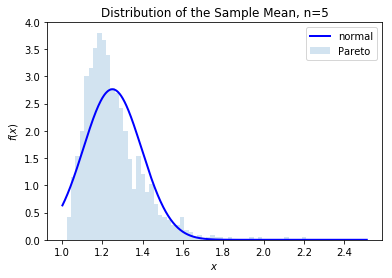

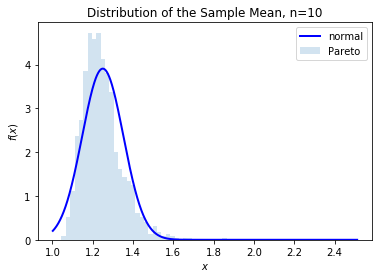

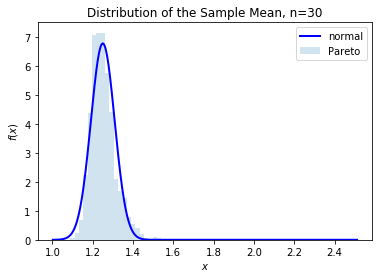

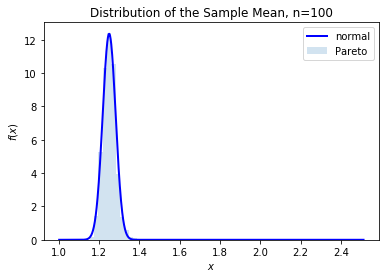

In [8]:
for n in [5, 10, 30, 100]:
    means = np.array([])
    for _ in range(1000):
        means = np.append(means, rv.rvs(n).mean())
    
    SD = math.sqrt(D / n) #Стандартное отклонение
    norm = sts.norm(E, SD) 

    plt.plot(x, norm.pdf(x), 'b', lw=2, label='normal')
    plt.hist(means, range=(a,b), bins=70, normed=True, alpha=0.2, histtype='stepfilled', label='Pareto')
    
    plt.title("Distribution of the Sample Mean, n={}".format(n))
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend()
    plt.show()

### Вывод:

Из полученных графиков непрерывного распределения Парето, можно заметить, что - с увеличением размера выборки $n$ распределение средних значений начинает сходиться к теоретическому среднему и точность аппроксимации распределения выборочных средних значений увеличивается. При этом гистограммы имеют распределение, близкое к нормальному, что соответствует утверждению Центральной Предельной Теоремы.